## **Intorduction**

**Context**

This is a historical dataset on the Modern Olympic Games, including all the Games from Sydney 2000 to London 2012. I got this data from our instructor. It contain all athletes wo have won any medal gold, silver or bronze, age of those athletes, they belong to which country, in what year they got their medals with dates and in which respective sport they have won.


**Content**


|**Variable**|**Description**|**Type**|
|-|-|-|
|**name**|name of athlete|categorical|
|**age**|age of athlete|numerical|
|**country**|country from athlete is|categorical|
|**year**|got medal in year|categorical|
|**Date_Given**|got medal in date|categorical|
|**sports**|sport in which medal got |categorical|
|**gold_medal**|number of gold medal won|numerical|
|**silver_medal**|number of silver medal won|numerical|
|**brone_medal**|number of bronze medal won|numerical|
|**total_medal**|total medal won|numerical|


Count of variables we have:

|**Type**|**Count**|
|-|-|
|categorical|5|
|numerical|5|


In [1]:
# importing required libraries
import numpy as np # data handling library
import pandas as pd # data manipulation library
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
import plotly.express as px # data visualization library
import missingno as msno # data visualization library for missing data

In [2]:
# importing the data
df = pd.read_csv(r'C:\Users\ASUS\Desktop\python\capstone\olympix_data_organized_with_header (1).csv')

## **Basic Exploration**

In [3]:
df.shape # shape of our data

(8618, 10)

In [4]:
print('Number of observations    : ', df.shape[0]) # number of rows in dataset
print('Number of variables       : ', df.shape[1]) # number of columns in dataset

Number of observations    :  8618
Number of variables       :  10


In [5]:
df.columns # columns we have in our dataset

Index(['name', 'age', 'country', 'year', 'Date_Given', 'sports', 'gold_medal',
       'silver_medal', 'brone_medal', 'total_medal'],
      dtype='object')

In [6]:
df.head() # viewing first 5 rows

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,8/12/2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10/1/2000,Gymnastics,2,1,3,6


In [7]:
df.tail() # viewing last 5 rows

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
8613,Olena Sadovnycha,32.0,Ukraine,2000,10/1/2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,10/1/2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,10/1/2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,10/1/2000,Archery,0,0,1,1
8617,Rod White,23.0,United States,2000,10/1/2000,Archery,0,0,1,1


In [8]:
df.info() # checking for null values and data types of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   int64  
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   brone_medal   8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


- here we can see that there is missing values in name and age variables
- also year and date_given column are wrongly read

In [9]:
df['year'] = df['year'].astype('object') # changing year to category

In [10]:
df['Date_Given'] = pd.to_datetime(df['Date_Given'], format='%m/%d/%Y') # changing date to datetime

In [11]:
# checking if datatypes got changed or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          8613 non-null   object        
 1   age           8613 non-null   float64       
 2   country       8618 non-null   object        
 3   year          8618 non-null   object        
 4   Date_Given    8618 non-null   datetime64[ns]
 5   sports        8618 non-null   object        
 6   gold_medal    8618 non-null   int64         
 7   silver_medal  8618 non-null   int64         
 8   brone_medal   8618 non-null   int64         
 9   total_medal   8618 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 673.4+ KB


In [12]:
num_col = df.select_dtypes(include='number').columns # taking out our numerical variables
num_col # viewing our numerical variables

Index(['age', 'gold_medal', 'silver_medal', 'brone_medal', 'total_medal'], dtype='object')

In [13]:
# statistical measures for numerical variables
df[num_col].describe()

,age,gold_medal,silver_medal,brone_medal,total_medal
count,8613.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,26.405434,0.364702,0.363309,0.377698,1.105709
std,5.102118,0.545349,0.511613,0.505005,0.408892
min,15.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,0.000000,0.000000,0.000000,1.000000
75%,29.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,8.000000,3.000000,3.000000,8.000000


In [14]:
cat_col = df.select_dtypes(include='object').columns # taking out our categorical variables
df[cat_col]=df[cat_col].astype('category') # changing data type to category
cat_col # viewing our categorical variables

Index(['name', 'country', 'year', 'sports'], dtype='object')

In [15]:
# statiscal measures for categorical variables
df[cat_col].describe()

,name,country,year,sports
count,8613,8618,8618,8618
unique,6955,110,7,49
top,Wang Hao,United States,2008,Athletics
freq,4,1109,1872,687


## **Missing Values**

In [16]:
missing_values = df.isna().sum() #assigning missing values to variable
missing_values # viewing missing values


name            5
age             5
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

- as said earlier there are missing values in name and age variable

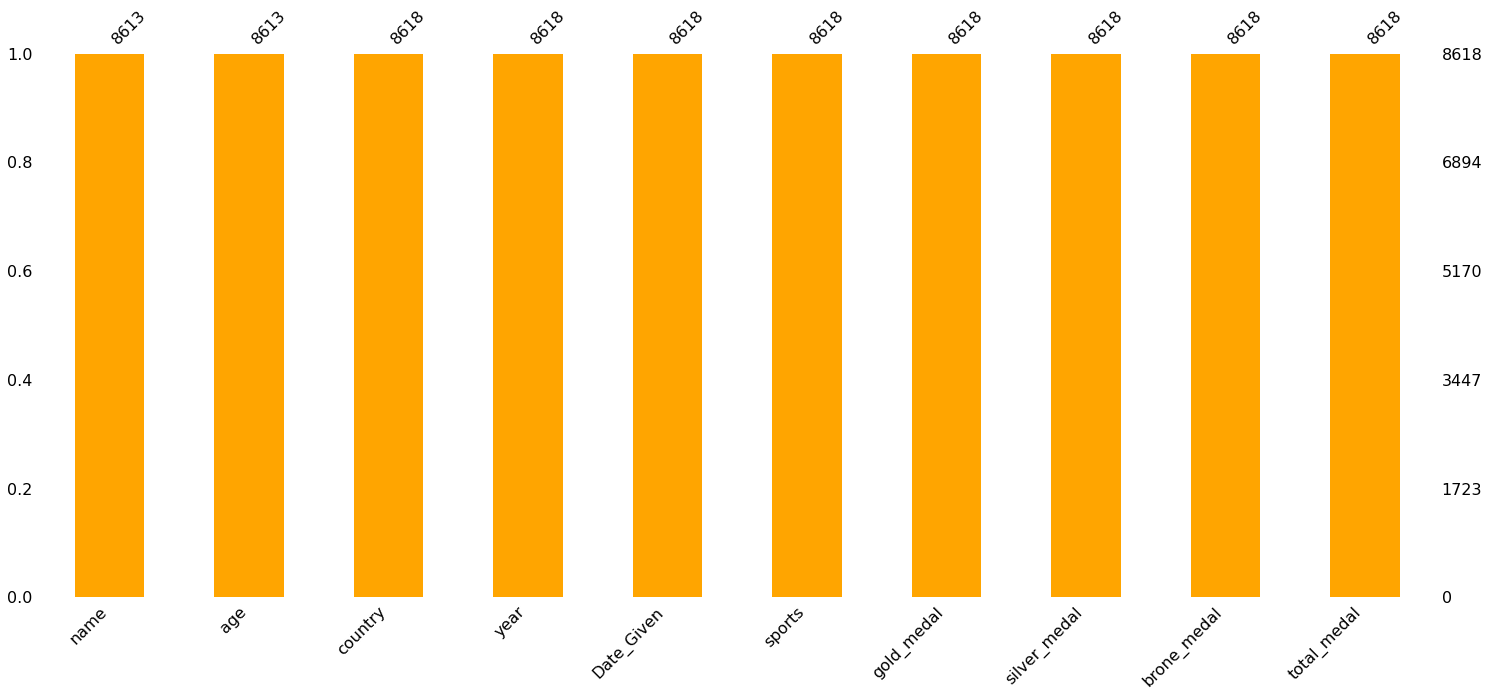

In [17]:
msno.bar(df,color='orange') # visualizing missing values
plt.show() # viewing chart

In [18]:
# missing values percentage
print('Name :', round((missing_values['name']/df.shape[0])*100,2),'%')
print('Age  :', round((missing_values['age']/df.shape[0])*100,2),'%')

Name : 0.06 %
Age  : 0.06 %


- removing missing values directly as less than 0.1% is missing data and it will not affect our dataset

In [19]:
# dropping missing values from dataset
df = df.dropna()

In [20]:
# re-checking if missing values got removed or not
df.isna().sum()

name            0
age             0
country         0
year            0
Date_Given      0
sports          0
gold_medal      0
silver_medal    0
brone_medal     0
total_medal     0
dtype: int64

In [21]:
# re-checking shape as we have dropped missing values
df.shape

(8613, 10)

- earlier it was 8618 observations 
- now it changed to 8613 after dropping missing values

## **Removing duplicates if having**

In [22]:
# dropping duplicates from our dataset
df.drop_duplicates()

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,2008-08-24,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,2004-08-29,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,2012-08-12,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,2008-08-24,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,2000-10-01,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,2000-10-01,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,2000-10-01,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,2000-10-01,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,2000-10-01,Archery,0,0,1,1


In [23]:
# re-checking shape as we dropped duplicates
df.shape

(8613, 10)

- shape remains same as no duplicates were there

## **Removing special characters from name column**

In [24]:
import unicodedata # importing unicode module
def strip_accents(text): 
    return ''.join(char for char in
                   unicodedata.normalize('NFKD', text) # replace all compatibility characters with their equivalents
                   if unicodedata.category(char) != 'Mn')
new_name = []
for i in df['name'].values: #iterating through name variable
    a = strip_accents(i) # removing all latin charters
    new_name.append(a) # adding to new_name list

df['name'] = new_name # replacing new_name list with our name variable


- all latin characters have been removed like
- - Simona AmÃ¢nar       to  Simona Amanar
- - NicolÃ¡s MassÃº      to  Nicolas Massu
- - Matti HautamÃ¤ki     to  Matti Hautamaki
- - Kjetil AndrÃ© Aamodt to  Kjetil Andre Aamodt








## **Perform data visualization techniques to appropriate columns and explain them**

In [25]:
c = df.country.value_counts()
px.bar(c[:20], color=c.index[:20], title="Top 20 countries in terms of number of participants :")

- as you can see that United States has highest number of participants with 1109
- followed by russia 706, germany 552,  australia 524

In [ ]:
s = df.sports.value_counts()
px.bar(s[:20], color=s.index[:20], title='Top 20 sports category in terms of number of participants :')


- most number of participants have taken part in athletics 
- followed by rowing, swimming, football and so on

In [ ]:
y = df.year.value_counts()
px.bar(y, color=y.index, title='Total number of participants in particular year :')

- as you can see year 2008 has the highest number of participants of 1872
- after that year 2000 and 2004 has almost same number of participants 1840 and 1839
- followed by year 2012 with 1771

## **Age Column Skewness**

In [ ]:
def histplot(df, variable): # creating function for histogram that take data frame and variable 
    plt.figure(figsize=(10,6)) # figure size
    plt.title(f'Distribution of {variable}', fontsize = 15) # figure title
    sns.histplot(data=df, x=variable, bins = 20, kde= True, color='green') # config of histogram plot
    plt.axvline(df[variable].mean(), color = 'red', alpha = 0.5, label = 'Mean', linestyle ='--') # plotting mean line
    plt.axvline(df[variable].median(), color = 'blue', alpha = 0.5, label = 'Median', linestyle ='--') # plotting median line
    plt.xlabel(f'{variable}', fontsize = 12) # setting x label
    plt.ylabel('Count', fontsize = 12) # setting y label
    plt.legend() # setting legend in plot
    plt.show() # viewing graph
    print()
    print(f'{variable} Skewness :',round(df[variable].skew(),2)) # variable skewness
    print(f'{variable} Mean     :',round(df[variable].mean(),2)) # variable mean
    print(f'{variable} Median   :',round(df[variable].median(),2)) # variable median
    

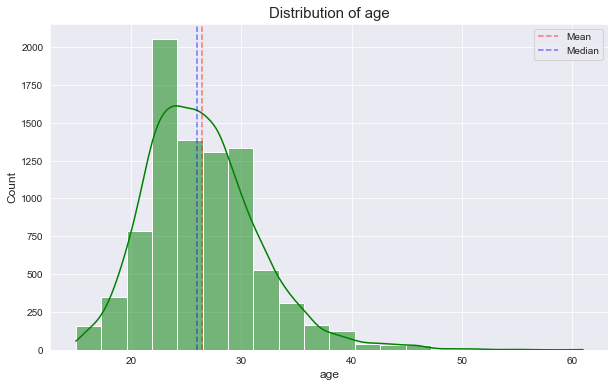


age Skewness : 0.86
age Mean     : 26.41
age Median   : 26.0


In [ ]:
histplot(df,'age') # calling histogram plot for age variable 

- skewness is 0.86 which lies in moderate skewed
- also mean and median are almost identical so we can say that it's nearly symmetrical

### 1. Transforming Age variable

In [ ]:
age_log = df.age.transform('log').to_frame() # log transformation on age
age_sqrt = df.age.transform('sqrt').to_frame() # square root transformation on age
age_cbrt = df.age.transform('cbrt').to_frame() # cube root transformation on age

In [ ]:
def  side_by_side(dataframe): # creating a side by side comparison function
    sns.set_style('darkgrid') # setting background color of plot
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6)) # setting two columns of given sizes
    sns.histplot(data=df,x='age',bins = 20, kde=True, ax=ax[0], color='r') # config of 1st histogram plot
    ax[0].set_xlabel('Age', fontsize=12) # setting x label
    ax[0].set_ylabel('Count', fontsize=12) # setting y label
    ax[0].set_title('Original Data',fontsize=15) # setting title 
    ax[0].tick_params(labelsize=12)# setting size of graph fonts 


    sns.histplot(data=dataframe, x='age',bins = 20, kde=True, ax=ax[1], color='b') # config of 2nd histogram plot
    ax[1].set_xlabel('Age', fontsize=12) # setting x label
    ax[1].set_ylabel('Count', fontsize=12) # setting y label
    ax[1].set_title('Transformed Data',fontsize=15) # setting title 
    ax[1].tick_params(labelsize=12)# setting size of graph fonts 
    return plt.show() # viewing plots


 - **Original vs Log Transformed**

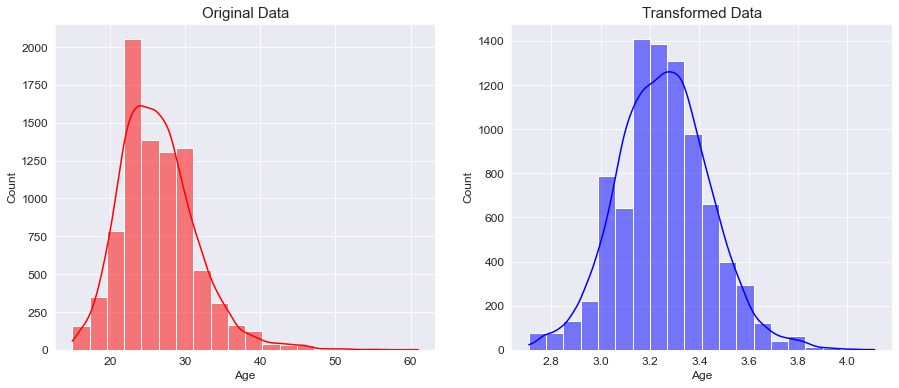

In [ ]:
side_by_side(age_log) # calling log transformed age

 - **Original vs Square Root Transformed**

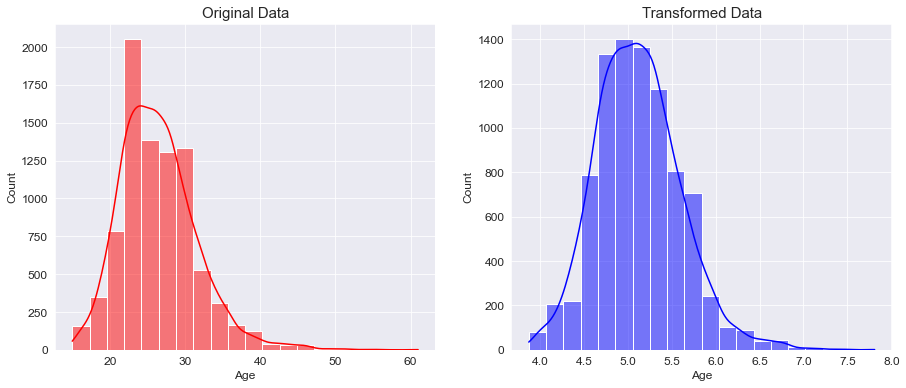

In [ ]:
side_by_side(age_sqrt) # calling square root transformed age

 - **Original vs Cube Root Transformed**

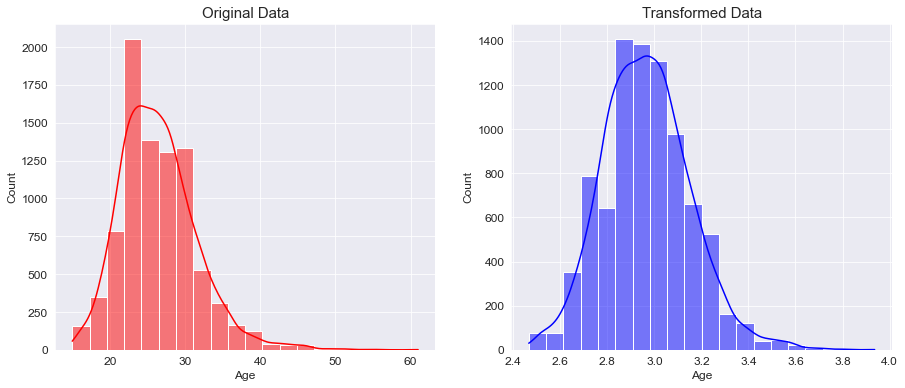

In [ ]:
side_by_side(age_cbrt) # calling cube root transformed age

In [ ]:
print('Original Age                :',round(df.age.skew(),2))
print('Log Transformed Age         :',round(age_log.age.skew(),2))
print('Square Root Transformed Age :',round(age_sqrt.age.skew(),2))
print('Cube Root Transformed Age   :',round(age_cbrt.age.skew(),2))

Original Age                : 0.86
Log Transformed Age         : 0.15
Square Root Transformed Age : 0.49
Cube Root Transformed Age   : 0.38


- as shown we can see that log transformation has done a better job in making the data more symmetric
- previous it was 0.86 skewness which was moderate skewed
- now it got changed to 0.15 skewness using log transformation which means it's now symmetric

### 2.  Removing outliers then checking skewness

**checking for outliers**

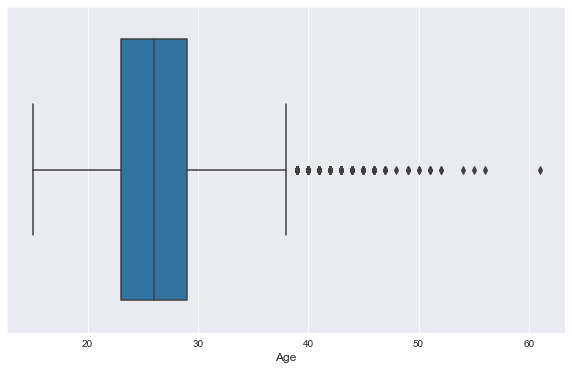

In [ ]:
plt.figure(figsize=(10,6)) # setting plot size
sns.boxplot(x=df.age) # configuring box plot
plt.xlabel('Age', fontsize=12) # giving x label and it's size
plt.show() # viewing plot

In [ ]:
Q1,Q3 = np.percentile(df['age'],(25,75)) # assigning 25 and 75 percentile
IQR = Q3 - Q1 # calculating iqr
upper_limit = Q3 + 1.5 * IQR # calculating upper whisker
lower_limit = Q1 - 1.5 * IQR # calculating lower whisker
out_data = df[(df['age'] < lower_limit) | (df['age'] > upper_limit)] # assigning outliers data
print("Upper whisker  : ", upper_limit) # printing upper whisker value
print("Lower Whisker  : ", lower_limit) # printing lower whisker value
print('Outliers in Age: ', round(out_data.shape[0]/df.shape[0]*100,2),'%') # printing outliers %
print()
print('Outliers data in dataset')

out_data # calling outliers dataset

Upper whisker  :  38.0
Lower Whisker  :  14.0
Outliers in Age:  2.23 %

Outliers data in dataset


,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
64,Dara Torres,41.0,United States,2008,2008-08-24,Swimming,0,3,0,3
438,Heike Kemmer,46.0,Germany,2008,2008-08-24,Equestrian,1,0,1,2
439,Eric Lamaze,40.0,Canada,2008,2008-08-24,Equestrian,1,1,0,2
440,Beezie Madden,44.0,United States,2008,2008-08-24,Equestrian,1,0,1,2
441,Hinrich Romeike,45.0,Germany,2008,2008-08-24,Equestrian,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...
8569,Ilario Di Buo,51.0,Italy,2008,2008-08-24,Archery,0,1,0,1
8598,Hiroshi Yamamoto,41.0,Japan,2004,2004-08-29,Archery,0,1,0,1
8604,Ilario Di Buo,43.0,Italy,2000,2000-10-01,Archery,0,1,0,1
8608,Butch Johnson,45.0,United States,2000,2000-10-01,Archery,0,0,1,1


- less than 3% outliers are there in age variable
- we can remove it directly as it is less in count and won't affect the dataset


In [ ]:
# creating new variable without any outliers in age 
new_df = df[(df['age'] > lower_limit) & (df['age'] < upper_limit)] # dataset without outliers

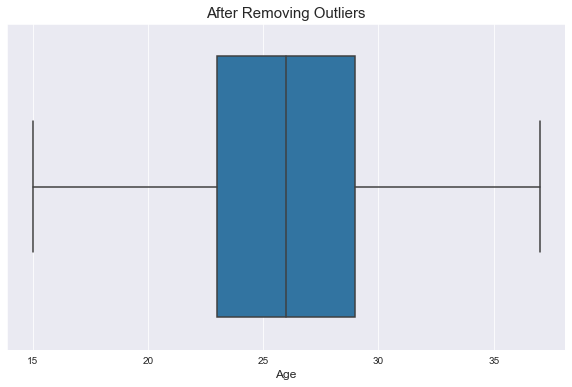

In [ ]:
plt.figure(figsize=(10,6)) # giving size to plot
plt.title('After Removing Outliers', fontsize=15) # giving title and fontsize
sns.boxplot(x=new_df.age) # configuring box plot
plt.xlabel('Age', fontsize=12) # giving x label
plt.show() # viewing our plot

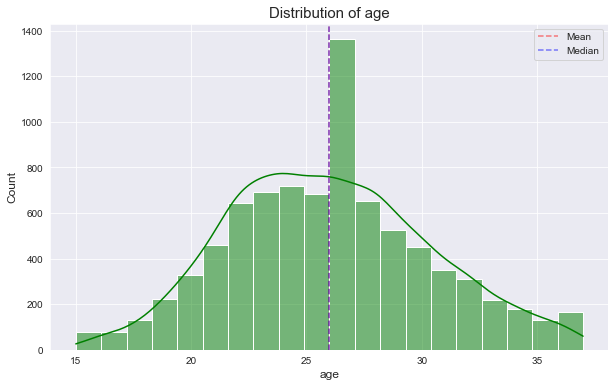


age Skewness : 0.2
age Mean     : 25.96
age Median   : 26.0


In [ ]:
histplot(new_df,'age')

- after removing outliers our data already got symmetrical skewed
- skewness is 0.2 which lies in symmetrical skewed
- mean and median is same which also tells us it's symmetrical distribution 

## Appropriate measures on numerical variables

**statistical measures of numerical variables**

In [ ]:
df[num_col].describe() 

,age,gold_medal,silver_medal,brone_medal,total_medal
count,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000
mean,26.405434,0.364914,0.362940,0.377917,1.105770
std,5.102118,0.545436,0.511531,0.505069,0.409003
min,15.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,0.000000,0.000000,0.000000,1.000000
75%,29.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,8.000000,3.000000,3.000000,8.000000


**skewness of numerical variables**

age             0.859007
gold_medal      1.638839
silver_medal    0.955039
brone_medal     0.762090
total_medal     5.580939
dtype: float64


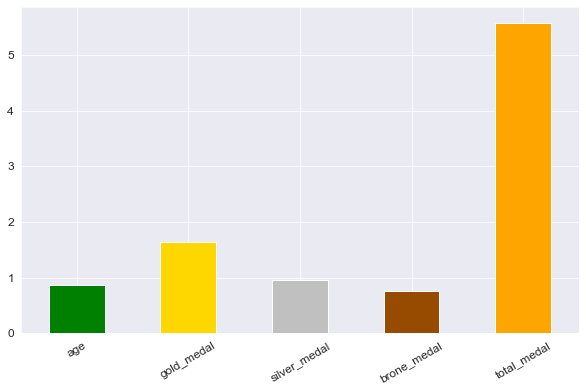

In [ ]:
print(df[num_col].skew()) # printing skewness values of all numerical variables
# visualizing skewness values in bar plot
plt.figure(figsize=(10,6)) # giving plot size
df[num_col].skew().plot(kind='bar',color = ['green','gold','silver','#964B00','orange']) # plotting bar graph using skewness
plt.tick_params(labelsize=12) # giving font size
plt.xticks(rotation=30, horizontalalignment="center") # rotating font
plt.show() # viewing graph

**outliers in numerical variables**

In [ ]:
def outliers(variable): # creating function for finding outliers
    Q1,Q3 = np.percentile(df[variable],(25,75)) # assigning 25 and 75 percentile
    IQR = Q3 - Q1 # calculating iqr
    upper_limit = Q3 + 1.5 * IQR # calculating upper whisker
    lower_limit = Q1 - 1.5 * IQR # calculating lower whisker
    out_data = df[(df[variable] < lower_limit) | (df[variable] > upper_limit)] # assigning outliers data
    print(f'Outliers in {variable}: ', round(out_data.shape[0]/df.shape[0]*100,2),'%') # printing outliers %


In [ ]:
outliers('age') # calling outliers in age
outliers('gold_medal') # calling outliers in gold medal
outliers('silver_medal') # calling outliers in silver medal
outliers('brone_medal') # calling outliers in bronze medal
outliers('total_medal') # calling outliers in total medal

Outliers in age:  2.23 %
Outliers in gold_medal:  0.34 %
Outliers in silver_medal:  0.1 %
Outliers in brone_medal:  0.06 %
Outliers in total_medal:  8.09 %



## Top 10 countries with the gold, silver, bronze medals and then total medals achieved

In [ ]:
def medals(category,colour,title): # creating medal function
    category = df.groupby('country')[category].sum().sort_values(ascending=False) # grouping country and sum of medals
    plt.figure(figsize=(10,6)) # giving graph size
    plots = category.head(10).plot(kind='bar',color=colour) # configuring our graph
    for bar in plots.patches: # iterating inside plot data
        plots.annotate(format(bar.get_height()), 
                    (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points') # configuring and adding annotation in bar plots
    plt.title(f'Top 10 Countries with {title} Medals',fontsize=15) # giving title
    plt.xlabel('') # removing x label
    plt.tick_params(labelsize=12) # giving size to fonts
    plt.xticks(rotation=30, horizontalalignment="center") # rotating fonts
    plt.show() # viewing graph

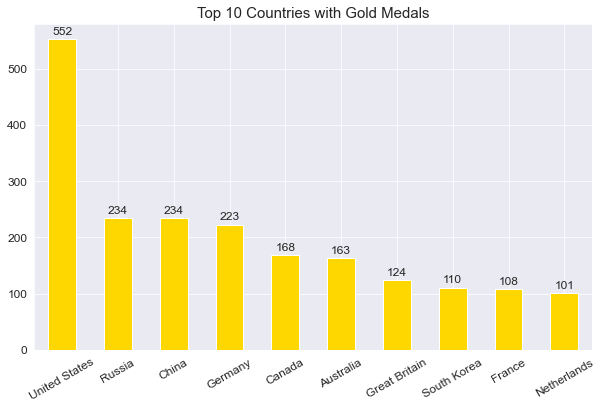

In [ ]:
medals('gold_medal','gold','Gold') # calling gold_medal with gold colored graph

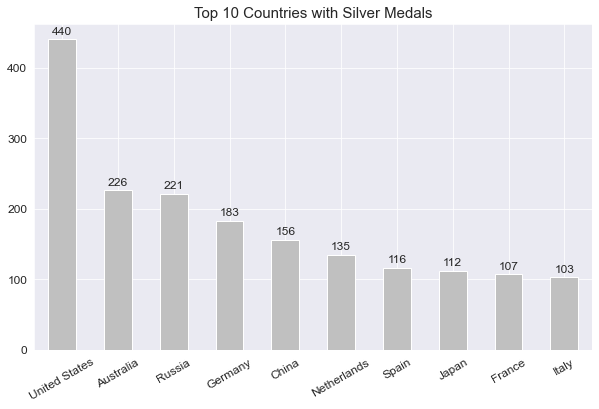

In [ ]:
medals('silver_medal','silver','Silver') # calling silver_medal with silver colored graph

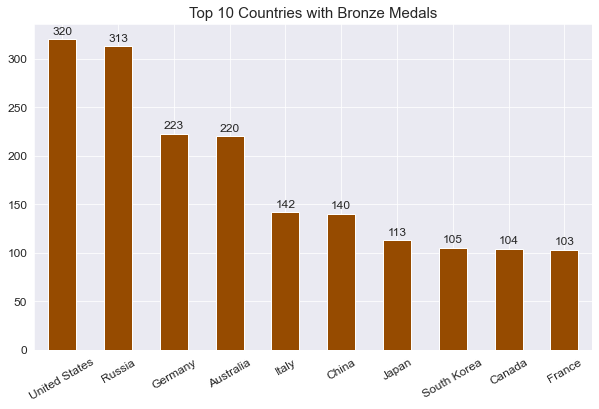

In [ ]:
medals('brone_medal','#964B00','Bronze') # calling bronze_medal with bronze colored graph

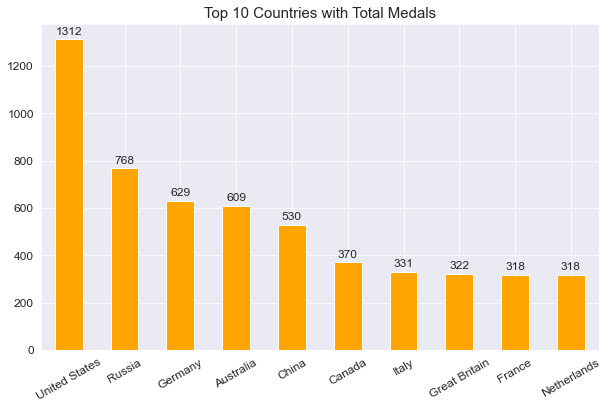

In [ ]:
medals('total_medal','orange','Total') # calling total_medal with orange colored graph

In [ ]:
# this cleaned data will be use on pyspark and MySQL so exporting it
# df.to_csv('olympix_data.csv', index=False) # saving the cleaned data 